In [38]:
import pandas


df = pandas.read_csv("benchmark.csv")
df["exp"] = df.apply(
    lambda r: ("AOT" if r["AOT"] else "") + "-" + ("REW" if r["rewriter"] else ""),
    axis=1,
)
df["exe"] = df["optimization"]
df = df[
    (df["providers"] == "CUDAExecutionProvider,CPUExecutionProvider")
    & (df["optimization"] == "GPU")
    | (df["providers"] == "CPUExecutionProvider") & (df["optimization"] == "CPU")
]
df.head(3).T

,0,1,4
processor,x86_64,x86_64,x86_64
cores,8,8,8
cuda,1,1,1
cuda_count,1,1,1
cuda_name,NVIDIA GeForce GTX 1060,NVIDIA GeForce GTX 1060,NVIDIA GeForce GTX 1060
cuda_capa,"(6, 1)","(6, 1)","(6, 1)"
name,simple_dynamo.onnx.cpu.aot0.onnx,simple_dynamo.onnx.cpu.aot0.onnx,simple_script.onnx.cpu.aot0.onnx
providers,CPUExecutionProvider,CPUExecutionProvider,CPUExecutionProvider
optimization,CPU,CPU,CPU
AOT,0,0,0


In [40]:
piv = pandas.pivot_table(
    df, index=["exp"], columns=["exe", "RUN-AOT", "export"], values="average"
)
piv

exe           CPU                                     GPU                      \
RUN-AOT         0                   1                   0                   1   
export     dynamo    script    dynamo    script    dynamo    script    dynamo   
exp                                                                             
-        0.016988  0.006951  0.020425  0.006818  0.002550  0.001690  0.002977   
-REW     0.024867       NaN  0.026551       NaN  0.002252       NaN  0.002883   
AOT-     0.045465  0.008608  0.048305  0.008839  0.005897  0.001566  0.004903   
AOT-REW  0.064311       NaN  0.064217       NaN  0.004037       NaN  0.004186   

exe                
RUN-AOT            
export     script  
exp                
-        0.002206  
-REW          NaN  
AOT-     0.002311  
AOT-REW       NaN

<Axes: ylabel='exe,RUN-AOT,export'>

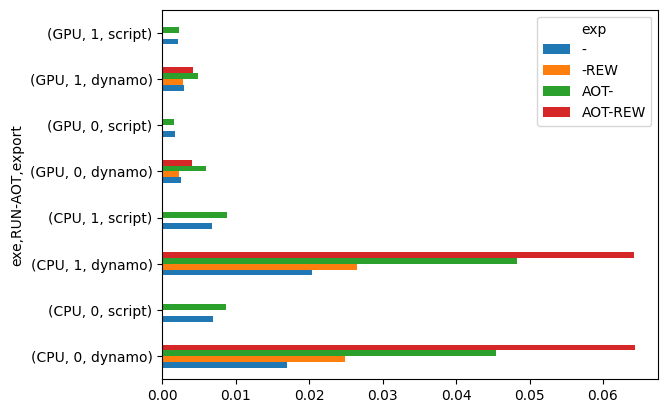

In [41]:
piv.T.plot.barh()